# Class Recap

## Objective

The objective of this assignment is to help students understand the importance of data quality for machine learning, particularly focusing on data cleaning ,data profiling, data normalization, handling missing data and imputation techniques. Through a motivating example, students will learn to apply their knowledge and create a practical notebook that demonstrates their proficiency in ensuring high-quality data for machine learning tasks.

## Abstract

Heart disease is a leading cause of morbidity and mortality worldwide, presenting a significant challenge to global health. Early detection and intervention are key to improving patient outcomes. 

## Dataset

This dataset encapsulates a range of clinical parameters observed in individuals, potentially linked to the presence or risk of heart disease. It includes attributes such as age, gender, chest pain type (cp), resting blood pressure (trtbps), cholesterol levels (chol), fasting blood sugar (fbs), resting electrocardiographic results (restecg), maximum heart rate achieved (thalachh), exercise-induced angina (exng), ST depression induced by exercise relative to rest (oldpeak), the slope of the peak exercise ST segment (slp), number of major vessels colored by fluoroscopy (caa), and thallium stress test result (thall). The output column indicates the presence of heart disease.



## Theoretical Foundation of Data Quality in Machine Learning

### 1. Data Cleaning
Data cleaning is a critical step in the data science process. It involves identifying and correcting (or removing) errors and inconsistencies in data to improve its quality. This includes handling outliers, incorrect entries, and formatting issues. Clean data is crucial for building reliable models.

### 2. Data Profiling
Data profiling involves examining the data available in an existing source and collecting statistics and information about that data. This process is vital for understanding the characteristics of data, including patterns, uniqueness, and distribution, which can influence subsequent analysis.

### 3. Data Normalization
Data normalization is a process that organizes data to reduce redundancy and improve data integrity. It often involves restructuring a database to reduce duplication and improve data efficiency, which is crucial for large datasets.

### 4. Handling Missing Data
Missing data can significantly impact the quality of analyses in data science. Identifying and addressing gaps in data are essential for maintaining the integrity of the dataset. Missing data can lead to biased estimates and incorrect conclusions.

### 5. Imputation Techniques
Imputation techniques are methods used to fill in missing or incomplete data. These techniques range from simple approaches, like filling missing values with the mean or median, to more complex algorithms. Proper imputation helps in maintaining the quality and usability of the dataset in analyses.



## Introduction to the Worked Example Problem: Heart Disease Prediction

Heart disease remains one of the leading causes of death globally, presenting significant challenges to healthcare systems. Early prediction and diagnosis of heart disease can lead to more effective treatment and management, potentially saving lives. Data science plays a crucial role in this area by leveraging patient data to predict heart disease.

In this example, we explore a dataset comprising various medical attributes of patients, such as age, cholesterol levels, heart rate, and more. The goal is to analyze this data to identify patterns and factors that contribute to heart disease. By applying data cleaning, profiling, normalization, and handling missing data, we aim to prepare the dataset for machine learning models that can predict the likelihood of heart disease in patients.

This problem is representative of real-world applications in healthcare data science, where the quality and preparation of data are critical for accurate predictions. 


# Data Profiling

Let's start with importing all the required libraries and the dataset for analyzing and checking the quality of data. 

In [2]:
#importing all the required libraries
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
# Loading the dataset
file_path = 'heart.csv'
heart_data = pd.read_csv(file_path)

Now, we will proceed with the data cleaning and profiling for the Heart Disease Dataset. This step is crucial to ensure the quality of our data before applying any machine learning techniques. 
First we will, check for any missing values.

In [4]:
# Displaying basic information about the dataset
dataset_info = {
    "Number of Rows": heart_data.shape[0],
    "Number of Columns": heart_data.shape[1],
    "First 5 Rows": heart_data.head()
}

dataset_info

{'Number of Rows': 303,
 'Number of Columns': 14,
 'First 5 Rows':    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
 0   63    1   3     145   233    1        0       150     0      2.3    0   
 1   37    1   2     130   250    0        1       187     0      3.5    0   
 2   41    0   1     130   204    0        0       172     0      1.4    2   
 3   56    1   1     120   236    0        1       178     0      0.8    2   
 4   57    0   0     120   354    0        1       163     1      0.6    2   
 
    caa  thall  output  
 0    0      1       1  
 1    0      2       1  
 2    0      2       1  
 3    0      2       1  
 4    0      2       1  }

# Handling Missing Data

In [5]:
# Checking for missing values
heart_data.isnull().sum()


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

There are no missing or NaN values in any of the columns. Handling Missing Data cannot be performed as there are no missing values.

In [6]:
# Examining data types
heart_data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

Most of the columns are of integer type (int64), while 'oldpeak' is a floating-point number (float64).
This indicates that the dataset primarily contains numerical data.

In [7]:
# Statistical summary
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The dataset provides a variety of measurements like age, blood pressure (trtbps), cholesterol levels (chol), etc.
The mean, standard deviation, minimum, and maximum values for each attribute can give us insights into their distribution. For example, the 'chol' (cholesterol) column has a mean of around 246 with a standard deviation of 51.83, indicating variability in cholesterol levels among patients.

# Data Cleaning

We'll now proceed with the outlier analysis and data normalization. Outliers can significantly affect the performance of machine learning models, and normalization ensures that all features contribute equally to the result.
We will use the Interquartile Range (IQR) method for outlier detection. This method involves calculating the IQR (the difference between the 75th and 25th percentiles) and identifying values that fall significantly outside the IQR.

In [8]:
# Outlier detection using IQR
Q1 = heart_data.quantile(0.25)
Q3 = heart_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((heart_data < (Q1 - 1.5 * IQR)) | (heart_data > (Q3 + 1.5 * IQR))).sum()
outliers

age          0
sex          0
cp           0
trtbps       9
chol         5
fbs         45
restecg      0
thalachh     1
exng         0
oldpeak      5
slp          0
caa         25
thall        2
output       0
dtype: int64

'trtbps' (resting blood pressure): 9 outliers
'chol' (cholesterol): 5 outliers
'fbs' (fasting blood sugar): 45 outliers
'thalachh' (maximum heart rate achieved): 1 outlier
'oldpeak' (ST depression induced by exercise relative to rest): 5 outliers
'caa' (number of major vessels colored by fluoroscopy): 25 outliers
'thall' (thalassemia): 2 outliers


# Data Normalization

We will normalize features like 'trtbps', 'chol', and 'thalachh'. Normalization is important as these features have different scales and units, and bringing them to a similar scale will improve model performance. We'll use StandardScaler from scikit-learn for normalization.

In [9]:
# Data Normalization using StandardScaler
scaler = StandardScaler()
scaled_features = ['trtbps', 'chol', 'thalachh']
heart_data_scaled = heart_data.copy()
heart_data_scaled[scaled_features] = scaler.fit_transform(heart_data[scaled_features])
heart_data_scaled.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,0.763956,-0.256334,1,0,0.015443,0,2.3,0,0,1,1
1,37,1,2,-0.092738,0.072199,0,1,1.633471,0,3.5,0,0,2,1
2,41,0,1,-0.092738,-0.816773,0,0,0.977514,0,1.4,2,0,2,1
3,56,1,1,-0.663867,-0.198357,0,1,1.239897,0,0.8,2,0,2,1
4,57,0,0,-0.663867,2.082050,0,1,0.583939,1,0.6,2,0,2,1


The features 'trtbps', 'chol', and 'thalachh' have been scaled using StandardScaler. This brings these features onto a similar scale, improving the consistency of the data for machine learning models.

# Handling Outliers

Let's implement capping of outliers. We will cap the values at the 5th and 95th percentiles for the columns with outliers. This approach will reduce the impact of extreme outliers while preserving the majority of the data. 

In [10]:
# Capping outliers at the 5th and 95th percentiles
for column in outliers.index[outliers > 0]:
    lower_bound = heart_data[column].quantile(0.05)
    upper_bound = heart_data[column].quantile(0.95)
    heart_data[column] = np.clip(heart_data[column], lower_bound, upper_bound)

In [11]:
# Rechecking for outliers after capping
outliers_post_capping = ((heart_data < (Q1 - 1.5 * IQR)) | (heart_data > (Q3 + 1.5 * IQR))).sum()
outliers_post_capping

age          0
sex          0
cp           0
trtbps       0
chol         0
fbs         45
restecg      0
thalachh     0
exng         0
oldpeak      0
slp          0
caa         25
thall        0
output       0
dtype: int64

The number of outliers in 'trtbps', 'chol', 'thalachh', and 'oldpeak' has been reduced to zero. For 'fbs' and 'caa', outliers still exist.

In [12]:
# Dataset after capping the outliers
heart_data.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,181.9,0,3.4,0,0,2,1
2,41,0,1,130,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120,326.9,0,1,163.0,1,0.6,2,0,2,1


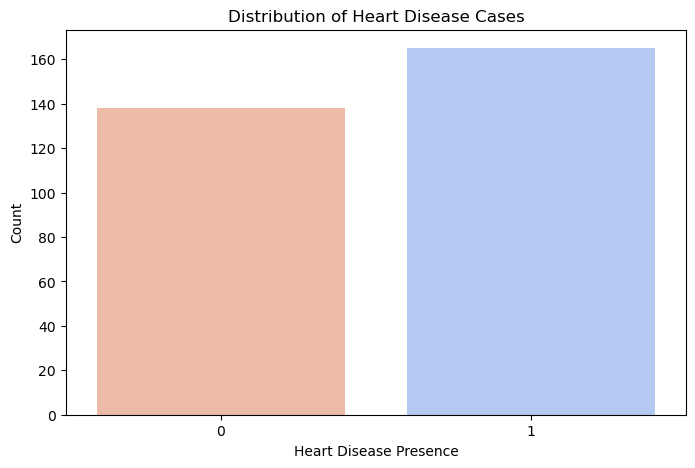

In [14]:
import seaborn as sns
# Visualization of the 'output' column
plt.figure(figsize=(8, 5))
sns.countplot(x='output', data=heart_data, palette='coolwarm_r')
plt.title('Distribution of Heart Disease Cases')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Count')
plt.show()

The number of cases for individuals with heart disease appears to be higher than those without, suggesting a greater prevalence of heart disease in this particular dataset.

In [15]:
# Displaying the value counts for the 'output' column
print(heart_data['output'].value_counts())

output
1    165
0    138
Name: count, dtype: int64


The next step is to prepare the dataset for machine learning model training. 

# Model Training

First, splitting the dataset into traning and testing data

In [16]:
# Features and Target
X = heart_data.drop('output', axis=1)  # all columns except 'output'
y = heart_data['output']  # target variable

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the resulting datasets
split_data_shapes = {
    "Training Features Shape": X_train.shape,
    "Training Labels Shape": y_train.shape,
    "Testing Features Shape": X_test.shape,
    "Testing Labels Shape": y_test.shape
}

split_data_shapes



{'Training Features Shape': (242, 13),
 'Training Labels Shape': (242,),
 'Testing Features Shape': (61, 13),
 'Testing Labels Shape': (61,)}

# Logistic Regression

We'll train a Logistic Regression model using the training data.

In [17]:
# Initializing the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Training the model
log_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = log_reg.predict(X_test)


Now,after training, we'll evaluate the model's performance on the testing set using metrics like accuracy, precision, recall, and possibly the confusion matrix.

In [18]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8688524590163934

In [19]:
precision = precision_score(y_test, y_pred)
precision

0.875

In [20]:
recall = recall_score(y_test, y_pred)
recall

0.875

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[25,  4],
       [ 4, 28]])

Evaluation Metrics of the Logistic regression model gives accuracy as 86.89%, precision as 87.5%, recall as 87.5% and confusion matrix as follows
True Negative (TN): 25
False Positive (FP): 4
False Negative (FN): 4
True Positive (TP): 28

In [22]:
# Evaluate the model on the training data
train_accuracy = log_reg.score(X_train, y_train)
print("Training accuracy:", train_accuracy)

# Evaluate the model on the testing data
test_accuracy = log_reg.score(X_test, y_test)
print("Testing accuracy:", test_accuracy)

Training accuracy: 0.8636363636363636
Testing accuracy: 0.8688524590163934


To find the most effective approach for this classification, let's explore two different machine learning models.

# Random Forest Classifier

In [23]:
# Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Training the Random Forest Classifier
rf_classifier.fit(X_train, y_train)

# Predicting on the test set with Random Forest
y_pred_rf = rf_classifier.predict(X_test)

In [24]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.8524590163934426

In [25]:
precision_rf = precision_score(y_test, y_pred_rf)
precision_rf

0.8484848484848485

In [26]:
recall_rf = recall_score(y_test, y_pred_rf)
recall_rf

0.875

In [27]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_rf

array([[24,  5],
       [ 4, 28]])

Evaluation Metrics of a Random Forest Classifier gives accuracy as 85.25%, precision as 84.85%, recall as 87.5% and confusion matrix as follows True Negative (TN): 24
False Positive (FP): 5
False Negative (FN): 4
True Positive (TP): 28

In [28]:
# Evaluate the model on the training data
train_accuracy_rf = rf_classifier.score(X_train, y_train)
print("Training accuracy:", train_accuracy_rf)

# Evaluate the model on the testing data
test_accuracy_rf = rf_classifier.score(X_test, y_test)
print("Testing accuracy:", test_accuracy_rf)

Training accuracy: 1.0
Testing accuracy: 0.8524590163934426


# Support Vector Machine

In [29]:
# Initializing the Support Vector Machine
svm_classifier = SVC()

# Training the Support Vector Machine
svm_classifier.fit(X_train, y_train)

# Predicting on the test set with SVM
y_pred_svm = svm_classifier.predict(X_test)

In [30]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_svm

0.6885245901639344

In [31]:
precision_svm = precision_score(y_test, y_pred_svm)
precision_svm

0.6585365853658537

In [32]:
recall_svm = recall_score(y_test, y_pred_svm)
recall_svm

0.84375

In [33]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
conf_matrix_svm

array([[15, 14],
       [ 5, 27]])

Evaluation Metrics of a SVM gives accuracy as 68.85%, precision as 65.85%, recall: 84.38%, confusion matrix as follows
True Negative (TN): 15
False Positive (FP): 14
False Negative (FN): 5
True Positive (TP): 27

In [34]:
# Evaluate the model on the training data
train_accuracy_svm = svm_classifier.score(X_train, y_train)
print("Training accuracy:", train_accuracy_svm)

# Evaluate the model on the testing data
test_accuracy_svm = svm_classifier.score(X_test, y_test)
print("Testing accuracy:", test_accuracy_svm)

Training accuracy: 0.6735537190082644
Testing accuracy: 0.6885245901639344


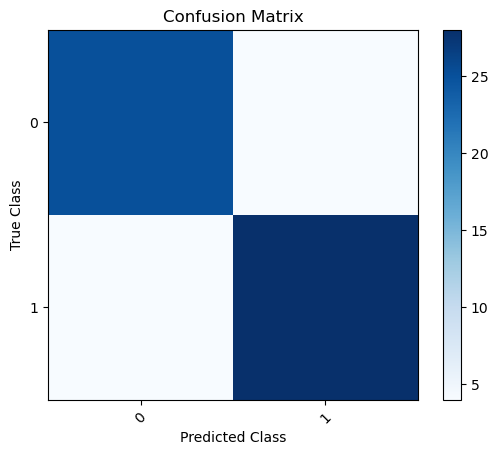

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [35]:
from sklearn.metrics import confusion_matrix, classification_report
labels = np.unique(y)
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()
# Print classification report
report = classification_report(y_test, y_pred, labels=labels)
print(report)

From the confusion matrix above, we see that the model is performing better in identifying class=1 with a precision and recall of 0.88 and 0.88 respectively. The performance for class=0 is not bad either.

After comparing all the models Logistic Regression model shows better performance across all metrics. It has higher accuracy and precision, indicating a more balanced approach to classifying both classes.

# Feature Importance

In [36]:
# Extracting feature importances from the Random Forest model
feature_importances = rf_classifier.feature_importances_

In [37]:
# Creating a series with feature names and their importance scores
importances = pd.Series(feature_importances, index=X.columns)

In [38]:
# Sorting the features based on importance
sorted_importances = importances.sort_values(ascending=False)

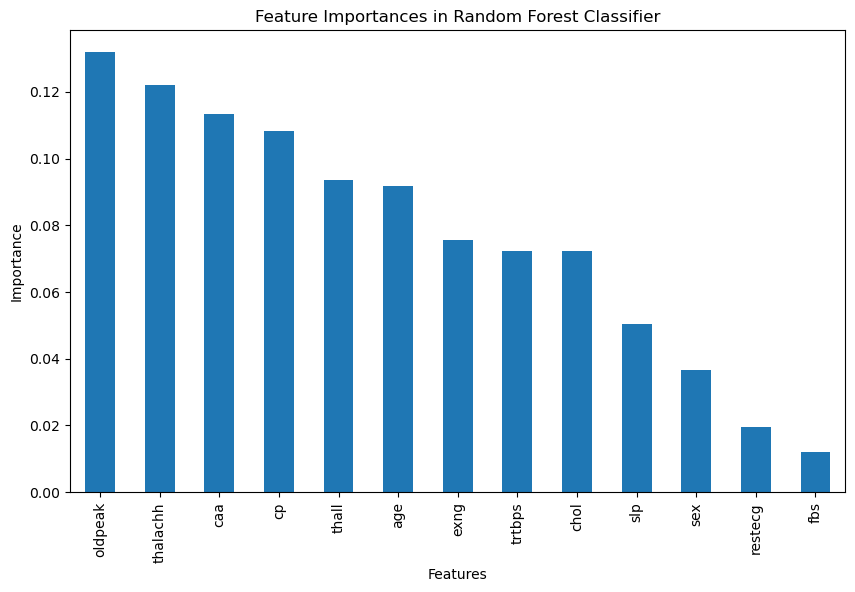

In [39]:
# Plotting
plt.figure(figsize=(10,6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances in Random Forest Classifier')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

The most important features are primarily clinical measurements, such as oldpeak, thalachh, and caa, which are critical in diagnosing heart disease. And the least important features are sex, restecg, and fbs (fasting blood sugar) have lower importance scores.

In [40]:
# Outputting the sorted importances for reference
sorted_importances

oldpeak     0.131847
thalachh    0.122030
caa         0.113329
cp          0.108264
thall       0.093650
age         0.091891
exng        0.075673
trtbps      0.072324
chol        0.072277
slp         0.050512
sex         0.036674
restecg     0.019396
fbs         0.012134
dtype: float64

# Data Analysis

Now visualizing the cleaned data using box plot

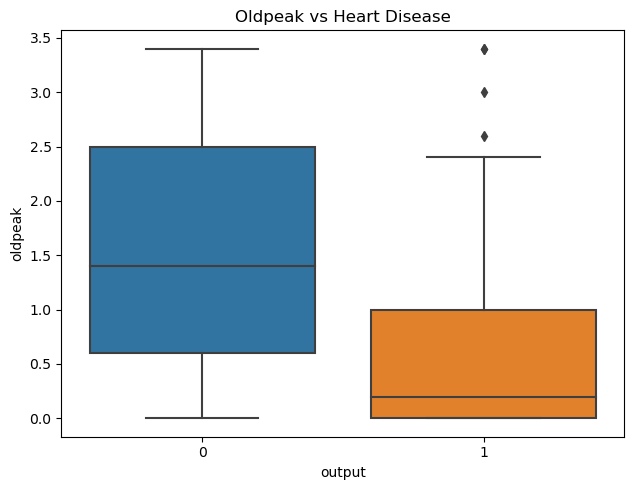

In [41]:
import seaborn as sns

# Setting up the plotting area
plt.figure(figsize=(18, 5))

# Plotting oldpeak vs output
plt.subplot(1, 3, 1)
sns.boxplot(x='output', y='oldpeak', data=heart_data)
plt.title('Oldpeak vs Heart Disease')
plt.tight_layout()
plt.show()



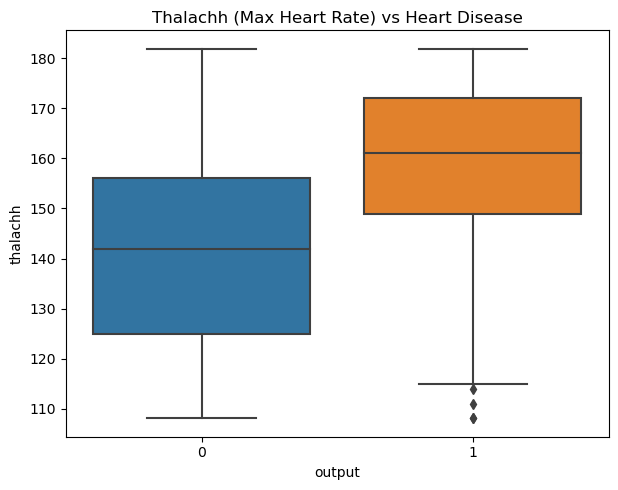

In [42]:
# Setting up the plotting area
plt.figure(figsize=(18, 5))# Plotting thalachh vs output
plt.subplot(1, 3, 2)
sns.boxplot(x='output', y='thalachh', data=heart_data)
plt.title('Thalachh (Max Heart Rate) vs Heart Disease')
plt.tight_layout()
plt.show()

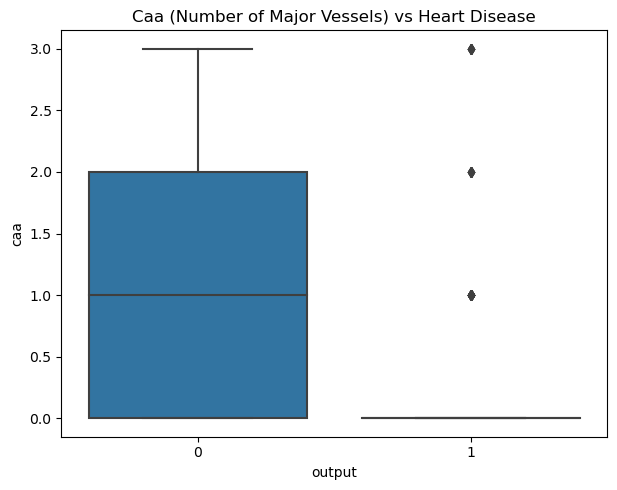

In [43]:
# Setting up the plotting area
plt.figure(figsize=(18, 5))
# Plotting caa vs output
plt.subplot(1, 3, 3)
sns.boxplot(x='output', y='caa', data=heart_data)
plt.title('Caa (Number of Major Vessels) vs Heart Disease')
plt.tight_layout()
plt.show()

In [44]:
# Separating the dataset into two groups: with and without heart disease
group_with_disease = heart_data[heart_data['output'] == 1]
group_without_disease = heart_data[heart_data['output'] == 0]

# T-Test for 'oldpeak'
t_stat_oldpeak, p_val_oldpeak = ttest_ind(group_with_disease['oldpeak'], group_without_disease['oldpeak'])

# T-Test for 'thalachh'
t_stat_thalachh, p_val_thalachh = ttest_ind(group_with_disease['thalachh'], group_without_disease['thalachh'])

# Preparing data for Chi-Squared Test for 'caa'
contingency_table_caa = pd.crosstab(heart_data['caa'], heart_data['output'])
chi2_stat_caa, p_val_caa, _, _ = chi2_contingency(contingency_table_caa)

# Compile the results
statistical_test_results = {
    "Oldpeak T-Test": {"T-Statistic": t_stat_oldpeak, "P-Value": p_val_oldpeak},
    "Thalachh T-Test": {"T-Statistic": t_stat_thalachh, "P-Value": p_val_thalachh},
    "Caa Chi-Squared Test": {"Chi2 Statistic": chi2_stat_caa, "P-Value": p_val_caa}
}

statistical_test_results



{'Oldpeak T-Test': {'T-Statistic': -8.514322579027667,
  'P-Value': 8.093793541351306e-16},
 'Thalachh T-Test': {'T-Statistic': 8.148873509161696,
  'P-Value': 9.944375387380558e-15},
 'Caa Chi-Squared Test': {'Chi2 Statistic': 67.5525238925834,
  'P-Value': 1.4262926080180113e-14}}

The Oldpeak test compares the 'oldpeak' values between patients with and without heart disease. The negative T-statistic indicates that the average 'oldpeak' is lower in patients without heart disease compared to those with heart disease. 
The Thalachh T-test is for 'thalachh' (maximum heart rate achieved). The positive T-statistic indicates that the average 'thalachh' is higher in patients with heart disease compared to those without.
The high Chi2 statistic and very low P-value suggest a strong and statistically significant association between the number of major vessels detected and the presence of heart disease.
These test results strongly suggest that 'oldpeak', 'thalachh', and 'caa' are significantly associated with the presence of heart disease. 

## Conclusion

In this analysis, I delved into the complexities of predicting heart disease using a heart dataset comprising various medical attributes. 
Through rigorous data cleaning, profiling, normalization, and handling outliers, I prepared the dataset for effective analysis. 
The application of statistical and machine learning techniques provided valuable insights into the factors influencing heart disease.
The analysis revealed significant predictors of heart disease, such as Output.
The data visualization techniques helped in understanding the distribution and relationship of these factors.
By comparing the machine learning models, Logistic Regression,RandomForest Classifier and Support Vector Machine we came to a conclusion that the Logistic Regression model is the best as it demonstrated a better performance in accuracy as 86.89%, precision as 87.5% in predicting heart disease, highlighting its potential in aiding early diagnosis.
This study highlights the critical role of data analysis in healthcare and opens avenues for future research that could contribute to better understanding and managing heart disease.


## References

1. Dataset: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv

2. Owner - AI Skunkworks Link:https://github.com/aiskunks/Skunks_Skool

3. Science Direct: https://www.sciencedirect.com/science/article/pii/S1877050920315210

4. Code Reference: https://github.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/tree/main/Understanding_Data

5. ChatGPT: https://chat.openai.com/share/24229415-7885-4259-be4d-611a0fd73d49

# License

## Copyright 2024 Akanksha Nakati

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.